In [1]:
import warnings
import numpy as np
import pandas as pd

# settings
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# visualization
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# data preprocessing and models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# machine learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# specific
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("C:/Users/Настя/YandexDisk-n4skolesnikova/HSE 4th year/Graduation Thesis/data/ACCIDENT_LEVEL_DATA.csv")
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(440127, 75)


,REGION,DATE,COORD_L,COORD_W,road_name,road_category,n_VEHICLES,n_PARTICIPANTS,ID,n_DEATHS,...,severity,YEAR,MONTH,WEEKDAY,SEASON,is_WEEKEND,HOUR,is_NIGHT,is_PEAK_HOUR,is_toll
0,1,31.01.2015,81.151944,53.740000,Романово - Завьялово - Баево - Камень-на-Оби,5.0,1,3,161242174,0,...,2,2015,1,5,1,1,9,0,1,0
1,1,30.01.2015,85.018056,51.684444,Куяган - Куяча - Тоурак,6.0,2,3,161105683,0,...,2,2015,1,4,1,0,14,0,0,0
2,1,30.01.2015,81.250000,53.818056,Барнаул - Камень-на-Оби - граница Новосибирско...,5.0,2,3,161763431,0,...,1,2015,1,4,1,0,17,0,1,0
3,1,24.01.2015,51.000000,84.000000,Быканов Мост - Солоновка - Солонешное - границ...,7.0,1,2,160331994,0,...,1,2015,1,5,1,1,19,0,0,0
4,1,23.01.2015,84.000000,53.000000,Быканов Мост - Солоновка - Солонешное - границ...,7.0,1,2,160213415,1,...,3,2015,1,4,1,0,21,0,0,0


In [4]:
df.columns

Index(['REGION', 'DATE', 'COORD_L', 'COORD_W', 'road_name', 'road_category',
       'n_VEHICLES', 'n_PARTICIPANTS', 'ID', 'n_DEATHS', 'n_INJURED',
       'vehicle_failure', 'non_private_vehicle', 'russian_vehicle',
       'white_vehicle', 'black_vehicle', 'colored_vehicle', 'drunk_driver',
       'female_driver', 'escaped', 'no_seatbelt_injury', 'n_drunk',
       'n_children', 'n_cyclists', 'n_pedestrians', 'vehicle_age_min',
       'vehicle_age_max', 'vehicle_age_avg', 'n_class_a', 'n_class_b',
       'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s', 'n_front_drive',
       'n_rear_drive', 'n_4wd', 'n_guilty', 'guilty_share',
       'n_fatal_violations', 'guilty_exp_avg', 'exp_avg', 'road_rank_cat',
       'road_defects_cat', 'traffic_changes_cat', 'road_surface_cat',
       'TYPE_cat', 'street_rank_cat', 'weather_cat', 'adj_objects_cat',
       'cause_factors_cat', 'crossing_violation', 'impaired_driving',
       'interference_violation', 'license_violation', 'maneuver_violation',


In [5]:
print(f"Final check for the gaps: {df.isna().any().sum()} gaps")

Final check for the gaps: 0 gaps


### Hypothesis 2.1. *«The probability of a more severe outcome of traffic accidents is higher on toll roads than on alternative free roads»*


### Hypothesis 2.2. *«The factors influencing the severity of traffic accidents differ for toll and free roads»*

In [5]:
df['severity'].unique()

array([2, 1, 3], dtype=int64)

C:\Users\Настя\AppData\Local\Temp\ipykernel_8220\545133162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


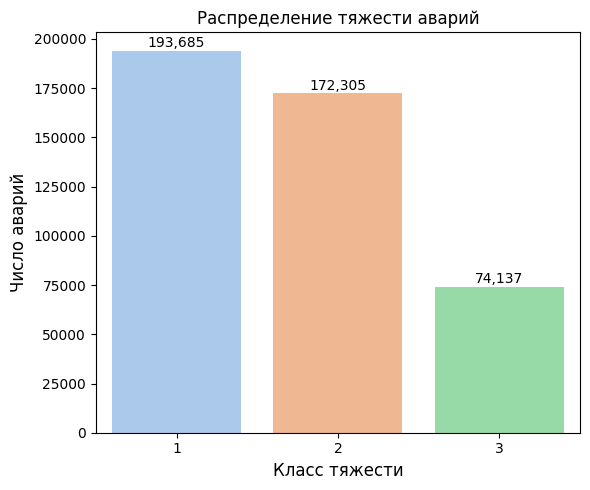

In [9]:
plt.figure(figsize=(6,5))
ax = sns.countplot(
    x='severity', 
    data=df, 
    order=[1, 2, 3],            # явный порядок категорий
    palette='pastel'            # мягкая цветовая гамма
)

# Подписи осей и заголовок
ax.set_xlabel('Класс тяжести', fontsize=12)
ax.set_ylabel('Число аварий', fontsize=12)
ax.set_title('Распределение тяжести аварий', fontsize=12)

# Пронумеруем частоты над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2, 
        height + 500,             # чуть выше вершины столбика
        f'{int(height):,}',       # с разделителем тысяч
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.tight_layout()
plt.show()

C:\Users\Настя\AppData\Local\Temp\ipykernel_19068\2100583160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\Настя\AppData\Local\Temp\ipykernel_19068\2100583160.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Бесплатная', 'Платная'])


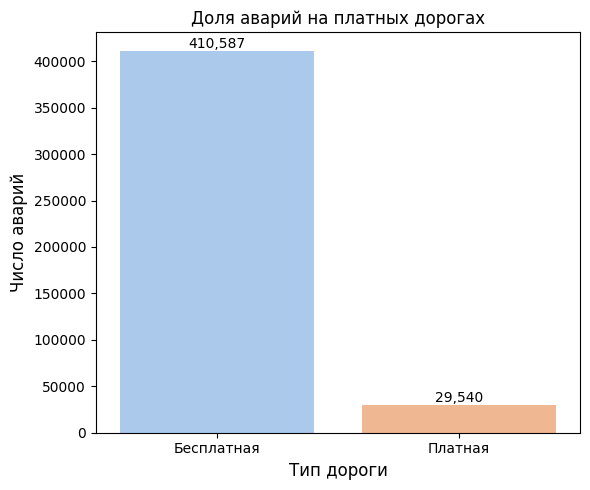

In [ ]:
plt.figure(figsize=(6,5))
ax = sns.countplot(
    x='is_toll', 
    data=df,
    palette='pastel'            # мягкая цветовая гамма
)

# Подписи осей и заголовок
ax.set_xlabel('Тип дороги', fontsize=12)
ax.set_ylabel('Число аварий', fontsize=12)
ax.set_title('Доля аварий на платных дорогах', fontsize=12)

ax.set_xticklabels(['Бесплатная', 'Платная'])

# Пронумеруем частоты над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 500,             # чуть выше вершины столбика
        f'{int(height):,}',       # с разделителем тысяч
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.tight_layout()
plt.show()

A slight reminder about the encoding of the "severity" feature before testing the hypotheses: light injuries - 1, medium injuries - 2, severe injuries - 3.

# Econometrics

## Analysis of features

First, it is necessary to check for multicollinearity in our data. To begin with, we will construct a correlation matrix between our predictor variables, which will help us visualize the presence or absence of potential multicollinearity in the data. For a more accurate check of multicollinearity, we will use the Variance Inflation Factor (VIF).

In [4]:
df_hypoth = df.copy()

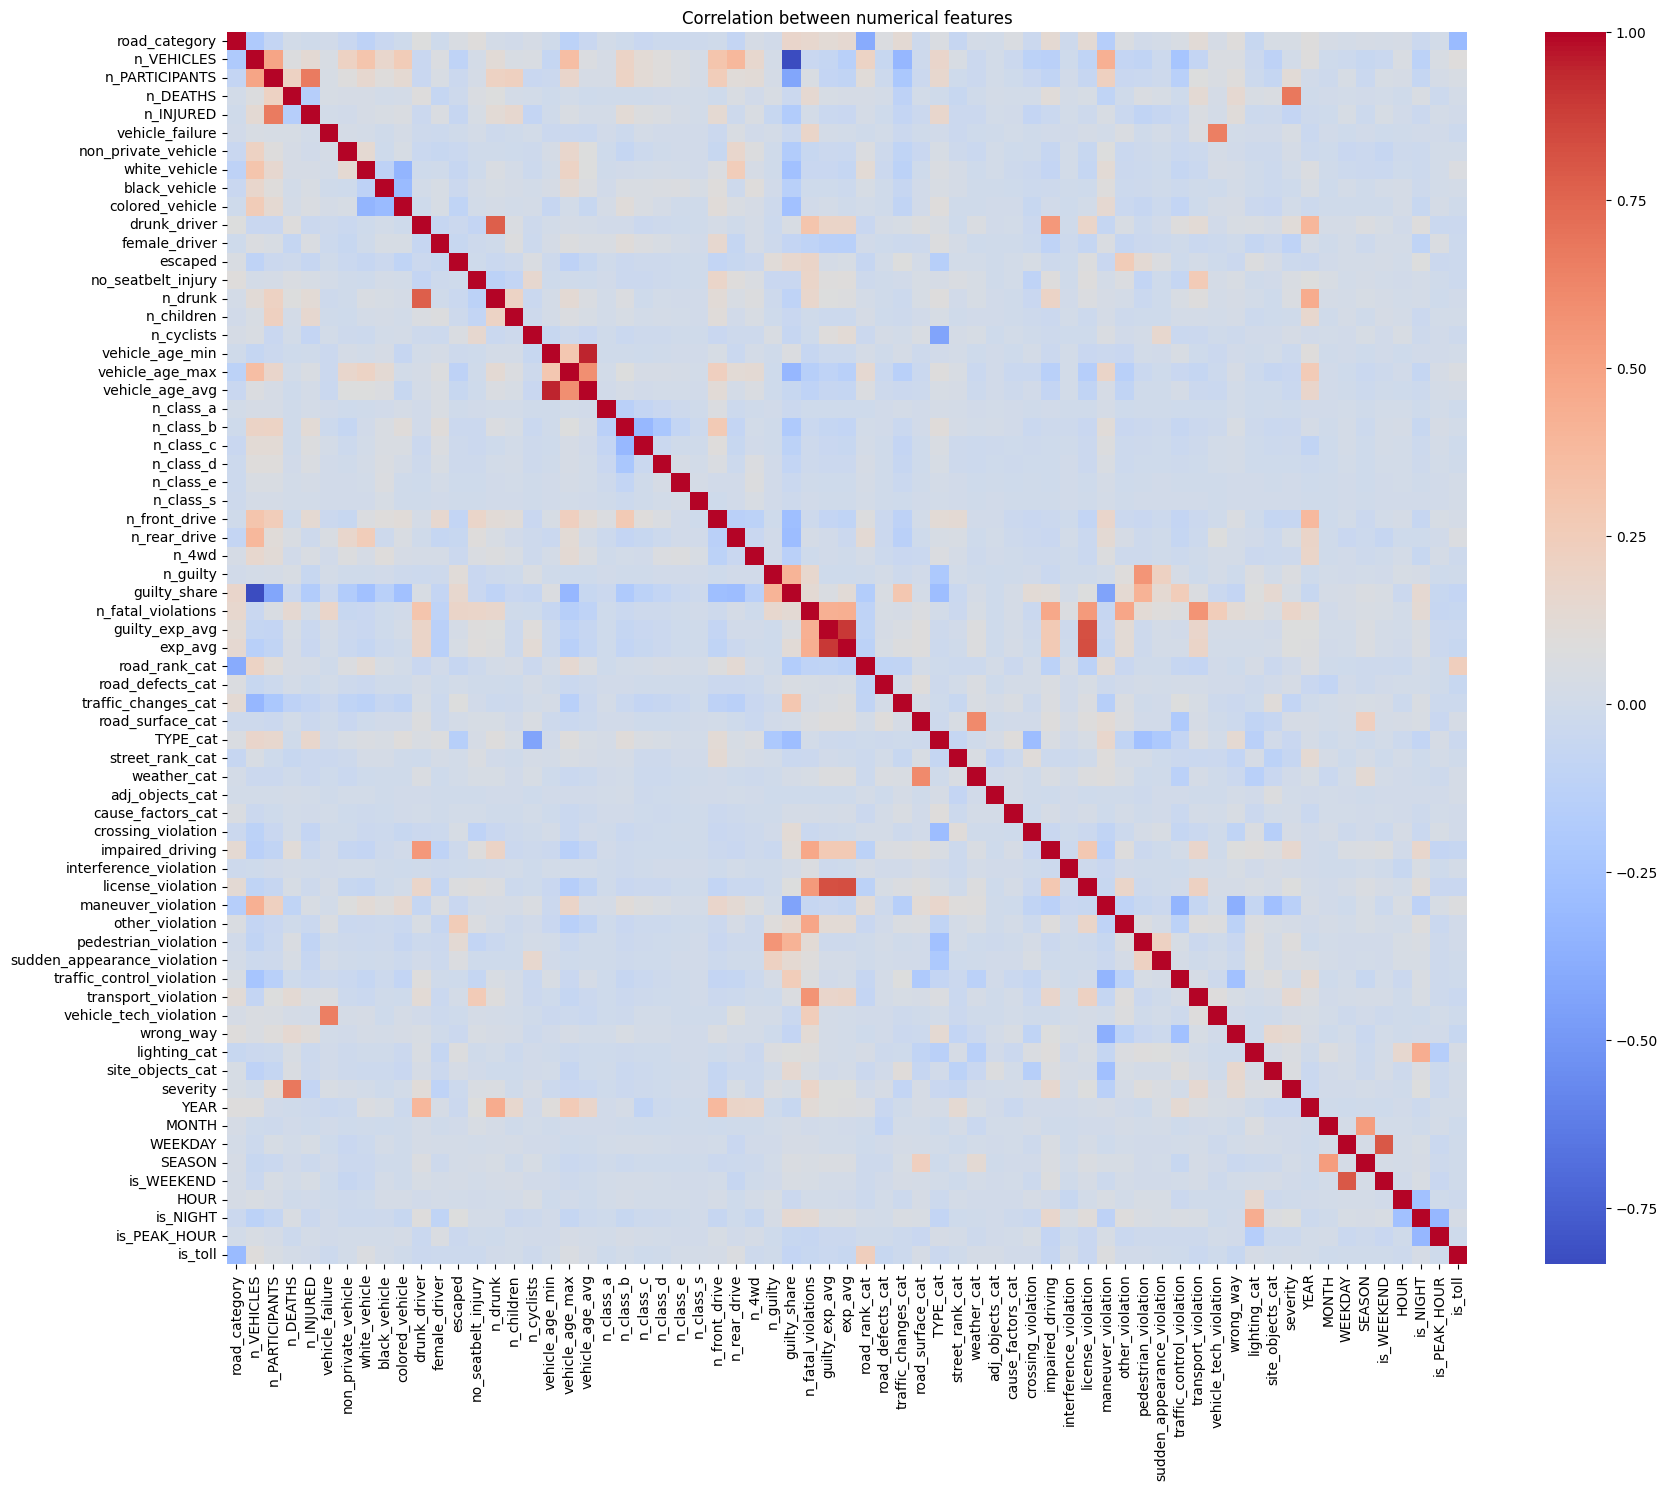

In [8]:
meaningful_df = df_hypoth.drop(['REGION', 'ID', 'COORD_L', 'COORD_W', 'russian_vehicle', 'n_pedestrians'], axis=1)
corr_matrix = meaningful_df.corr(numeric_only=True)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numerical features")
plt.show()

It can be observed that there is a strong positive correlation between the features `'vehicle_age_min'` and `'vehicle_age_max'`, `'guilty_exp_avg'` and `'exp_avg'`, `'n_drunk'` and `'drunk_driver'`, `'license_violation'` with `'n_drunk'` and `'drunk_driver'`, and `'WEEKDAY'` and `'is_WEEKEND'`. There is also a moderate to strong correlation between `'severity'` and `'n_DEATHS'`, and between `'vehicle_tech_violation'` and `'vehicle_failure'`, among others. Additionally, a strong negative correlation exists between `'guilty_share'` and `'n_VEHICLES'`. However, it is important to take a closer look at the correlation between all features and extract those whose absolute value exceeds 0.5.

In [9]:
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_pairs = corr_matrix.where(upper)

high_corr = corr_pairs.stack().reset_index()
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']

high_corr = high_corr[high_corr['Correlation'].abs() > 0.5]
high_corr = high_corr.reindex(high_corr['Correlation'].abs().sort_values(ascending=False).index)

print(high_corr)

                Feature1                Feature2  Correlation
987      vehicle_age_min         vehicle_age_avg     0.944598
1616      guilty_exp_avg                 exp_avg     0.897136
94            n_VEHICLES            guilty_share    -0.833200
1662             exp_avg       license_violation     0.830550
1629      guilty_exp_avg       license_violation     0.822163
2191             WEEKDAY              is_WEEKEND     0.798950
618         drunk_driver                 n_drunk     0.773074
248             n_DEATHS                severity     0.684722
132       n_PARTICIPANTS               n_INJURED     0.669315
367      vehicle_failure  vehicle_tech_violation     0.654224
1778    road_surface_cat             weather_cat     0.611941
1035     vehicle_age_max         vehicle_age_avg     0.589377
1601  n_fatal_violations     transport_violation     0.564393
1527            n_guilty    pedestrian_violation     0.563088
648         drunk_driver        impaired_driving     0.548836
1595  n_

In [5]:
features_to_drop = [
    'vehicle_age_min',
    'vehicle_age_max',
    'guilty_exp_avg',
    'WEEKDAY',
    'n_drunk',
    'n_PARTICIPANTS',
    'vehicle_failure',
    'drunk_driver',
    'MONTH'
]

df_hypoth.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
meaningful_df = df_hypoth.drop(['REGION', 'ID', 'COORD_L', 'COORD_W', 'russian_vehicle', 'n_pedestrians'], axis=1)
meaningful_df = meaningful_df.select_dtypes(include=['int64', 'float64'])

vif = pd.DataFrame()
vif["feature"] = meaningful_df.columns
vif["VIF"] = [variance_inflation_factor(meaningful_df.values, i) for i in range(meaningful_df.shape[1])]

C:\Users\Настя\AppData\Local\Temp\ipykernel_1148\3810041898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


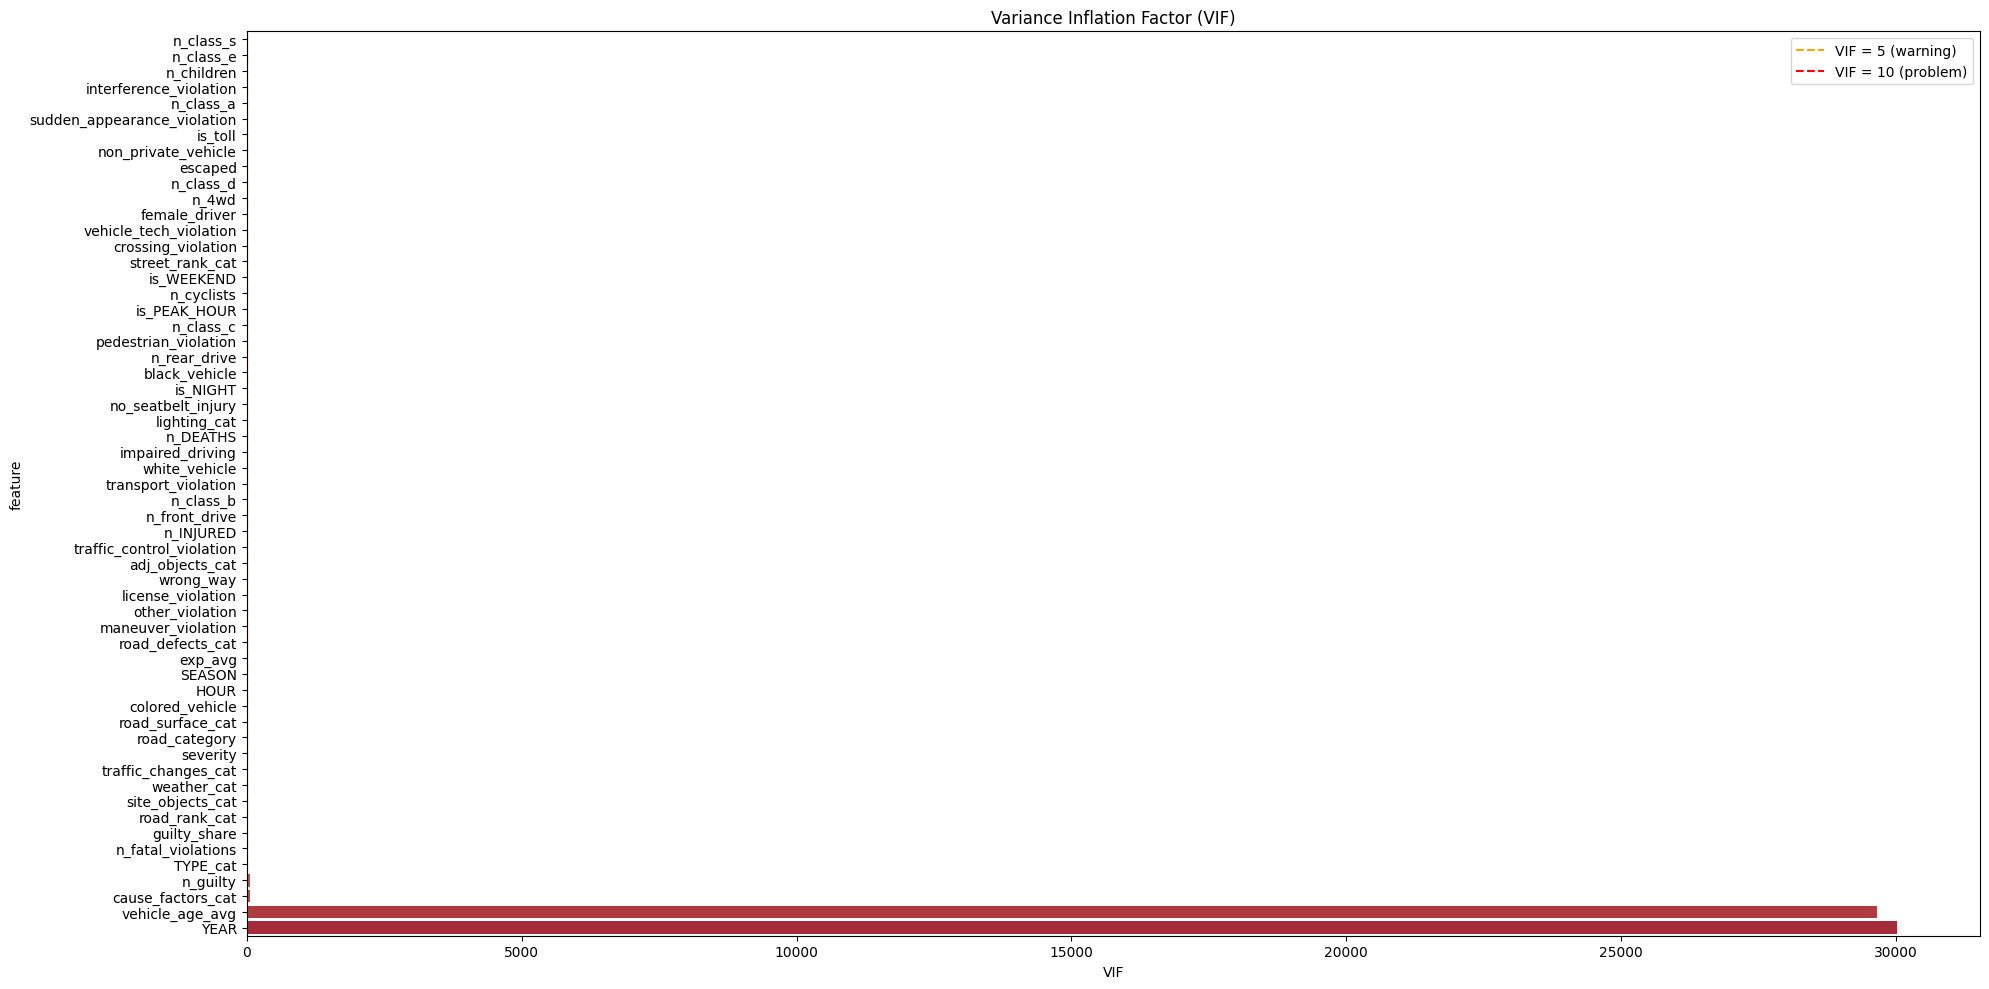

In [13]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=vif.sort_values(by="VIF", ascending=True),
    x="VIF",
    y="feature",
    palette="coolwarm"
)
plt.axvline(5, color='orange', linestyle='--', label='VIF = 5 (warning)')
plt.axvline(10, color='red', linestyle='--', label='VIF = 10 (problem)')
plt.title("Variance Inflation Factor (VIF)")
plt.xlabel("VIF")
plt.ylabel("feature")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
features_to_drop = ['vehicle_age_avg', 'YEAR']
df_hypoth.drop(features_to_drop, axis=1, inplace=True)

In [15]:
meaningful_df = df_hypoth.drop(['REGION', 'ID', 'COORD_L', 'COORD_W', 'russian_vehicle', 'n_pedestrians'], axis=1)
meaningful_df = meaningful_df.select_dtypes(include=['int64', 'float64'])

vif = pd.DataFrame()
vif["feature"] = meaningful_df.columns
vif["VIF"] = [variance_inflation_factor(meaningful_df.values, i) for i in range(meaningful_df.shape[1])]

C:\Users\Настя\AppData\Local\Temp\ipykernel_1148\3810041898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


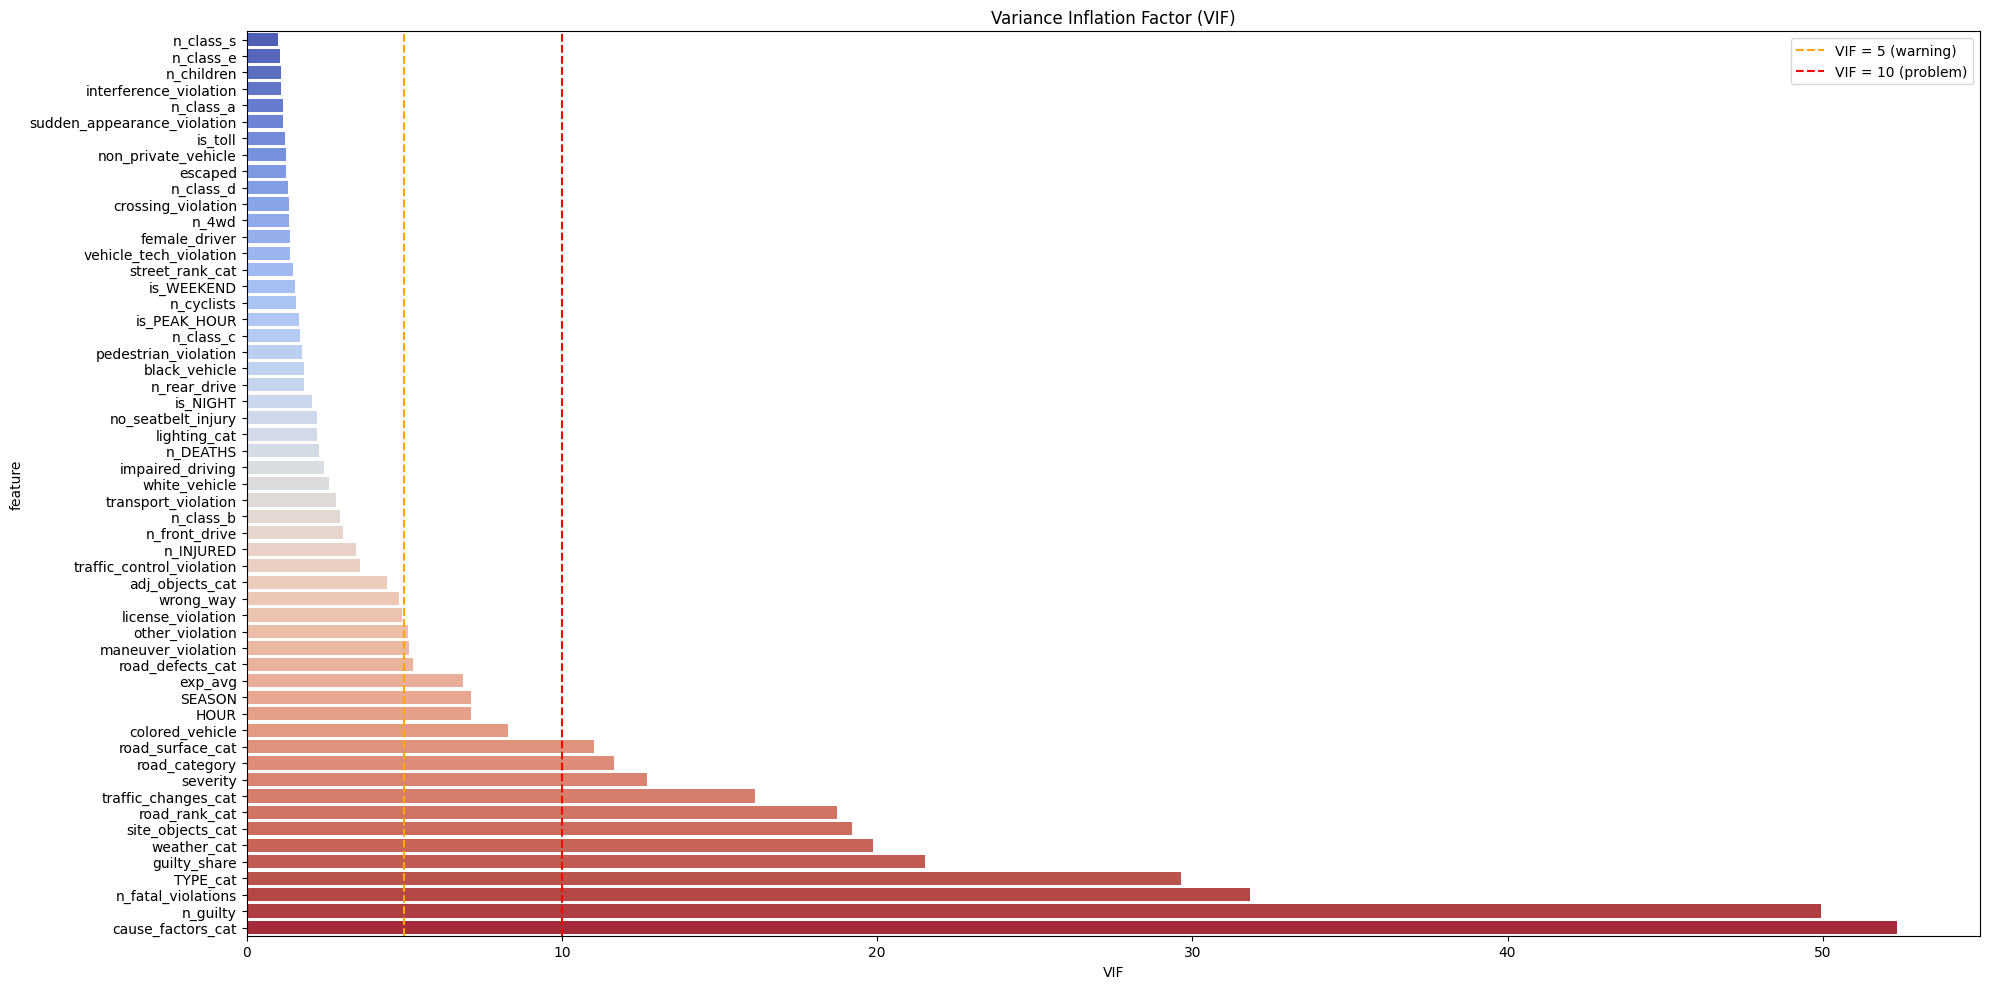

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=vif.sort_values(by="VIF", ascending=True),
    x="VIF",
    y="feature",
    palette="coolwarm"
)
plt.axvline(5, color='orange', linestyle='--', label='VIF = 5 (warning)')
plt.axvline(10, color='red', linestyle='--', label='VIF = 10 (problem)')
plt.title("Variance Inflation Factor (VIF)")
plt.xlabel("VIF")
plt.ylabel("feature")
plt.legend()
plt.tight_layout()
plt.show()

Despite the high values of `'cause_factors_cat'` and `'n_guilty'`, it was decided not to remove them from the dataset in order to maintain a comprehensive analysis. However, the high correlation and VIF values will be taken into account when interpreting the coefficients in the estimated models. Only the variables `'vehicle_age_avg'` and `'YEAR'` were removed due to their excessively high VIF values, as well as the features listed in `features_to_drop`, which exhibited extremely high correlations and/or duplicated each other or some of the core variables. For example, from the pair `'vehicle_age_min'` and `'vehicle_age_avg'`, only `'vehicle_age_avg'` was kept, as it better aggregates information about the age of vehicles. Similarly, `'exp_avg'` was retained instead of `'guilty_exp_avg'`, and `'guilty_share'` was kept instead of `'n_VEHICLES'`.

## Multinomial Logit (MNL) regression

Let's talk about the different model specifications that we will use to test the hypotheses.

**1. Base Model (`severity ~ is_toll`)**  
The initial specification includes only the `is_toll` variable to assess its direct relationship with accident severity without the influence of other factors. This simple model provides insight into the "raw" effect of toll roads and tests whether there is a statistically significant difference between accidents on toll and free roads. Although the results of this model may be biased due to unaccounted variables, it serves as an important starting point for hypothesis testing.

**2. Geographic and Road Specifications (`+ road_category + road_rank_cat + site_objects_cat + adj_objects_cat`)**  
In the second model, we add road type and category characteristics, as well as objects located along the roads. These features are necessary to rule out situations where accident severity is explained not by the toll status of the road, but, for example, by a higher class of the road or the specifics of the road infrastructure. By controlling for these factors, we check whether the `is_toll` effect remains robust when considering the possible structural differences between toll and free roads.

**3. Incident Condition Model (`+ weather_cat + lighting_cat + road_surface_cat + ...`)**  
The third model controls for external conditions at the time of the accident: weather factors, lighting, road surface condition, seasonality, and time characteristics. These variables are directly related to the probability of severe outcomes and may be unevenly distributed between toll and free roads. By adding them to the model, we minimize the risk of misinterpreting the `is_toll` effect, for example, due to frequent night-time accidents or precipitation on certain types of roads.

**4. Behavioral Model (`+ license_violation + impaired_driving + ...`)**  
The fourth specification focuses on the behavior of the participants in the accidents and the consequences of the accidents themselves. Variables such as the presence of violations, impaired driving, and the number of casualties reflect the immediate causes of accident severity. If the `is_toll` variable remains significant even after including these features, it indicates that its influence is not mediated solely by driver behavior but has an independent effect.

**5. Full Model (all control variables)**  
The fifth model combines all the previous blocks of features into one specification, creating the most comprehensive and rigorous test of the hypothesis. This model allows us to evaluate whether the toll road effect persists after simultaneously controlling for geographic, behavioral, infrastructure, and weather conditions. If the `is_toll` variable remains statistically significant and positively correlated with accident severity, it suggests a strong and reliable effect, supporting the original hypothesis.

#### Class `'is_toll'` imbalance

Earlier, a class imbalance was found in the `'is_toll'` variable: the positive class makes up less than 7% of the entire dataset. Therefore, the results of hypothesis testing on such data will not be representative.  
To address the class imbalance problem, we will try three methods:

0. Without balancing
1. Balancing using undersampling  
2. Balancing using oversampling

### (0). Without balancing

In [21]:
formula1 = 'severity ~ is_toll'

model = smf.mnlogit(formula1, data=df_hypoth)
result = model.fit()

print('\n1. Base model:')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.028194
         Iterations 5

1. Base model:
                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               440127
Model:                        MNLogit   Df Residuals:                   440123
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 May 2025   Pseudo R-squ.:               0.0001829
Time:                        04:32:13   Log-Likelihood:            -4.5254e+05
converged:                       True   LL-Null:                   -4.5262e+05
Covariance Type:            nonrobust   LLR p-value:                 1.118e-36
severity=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1258      0.003    -36.713      0.000      -0.133      -0.119
is_toll      

In [22]:
formula2 = 'severity ~ is_toll + road_category + road_rank_cat + site_objects_cat + adj_objects_cat + street_rank_cat'

model = smf.mnlogit(formula2, data=df_hypoth)
result = model.fit()

print('\n2. Geographical and road specification:\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.022535
         Iterations 6

2. Geographical and road specification:

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               440127
Model:                        MNLogit   Df Residuals:                   440113
Method:                           MLE   Df Model:                           12
Date:                Sat, 03 May 2025   Pseudo R-squ.:                0.005685
Time:                        04:32:22   Log-Likelihood:            -4.5005e+05
converged:                       True   LL-Null:                   -4.5262e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
      severity=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3973      0.026    -15.254     

In [23]:
formula3 = 'severity ~ is_toll + weather_cat + lighting_cat + road_surface_cat + traffic_changes_cat + is_NIGHT + is_PEAK_HOUR + is_WEEKEND + SEASON + cause_factors_cat'

model = smf.mnlogit(formula3, data=df_hypoth)
result = model.fit()

print('\n3. Model of incident conditions:\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.018672
         Iterations 5

3. Model of incident conditions:

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               440127
Model:                        MNLogit   Df Residuals:                   440105
Method:                           MLE   Df Model:                           20
Date:                Sat, 03 May 2025   Pseudo R-squ.:                0.009442
Time:                        04:32:37   Log-Likelihood:            -4.4835e+05
converged:                       True   LL-Null:                   -4.5262e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
         severity=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4647      0.032    -14.613   

In [24]:
formula4 = 'severity ~ is_toll + wrong_way + pedestrian_violation + impaired_driving + maneuver_violation + traffic_control_violation + license_violation\
       + transport_violation + crossing_violation + interference_violation + sudden_appearance_violation + other_violation + n_guilty'

model = smf.mnlogit(formula4, data=df_hypoth)
result = model.fit()

print('\n4. Behavioral model:\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.990291
         Iterations 6

4. Behavioral model:

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               440127
Model:                        MNLogit   Df Residuals:                   440099
Method:                           MLE   Df Model:                           26
Date:                Sat, 03 May 2025   Pseudo R-squ.:                 0.03704
Time:                        04:33:21   Log-Likelihood:            -4.3585e+05
converged:                       True   LL-Null:                   -4.5262e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3502      0.023  

In [25]:
formula5 = (
    'severity ~ is_toll + road_category + road_rank_cat + site_objects_cat + adj_objects_cat\
    + weather_cat + lighting_cat + road_surface_cat + traffic_changes_cat + is_NIGHT + is_PEAK_HOUR + is_WEEKEND + SEASON\
    + wrong_way + pedestrian_violation + impaired_driving + maneuver_violation + traffic_control_violation + license_violation\
    + transport_violation + crossing_violation + interference_violation + sudden_appearance_violation + other_violation\
    + TYPE_cat + exp_avg + guilty_share + n_fatal_violations + n_INJURED + cause_factors_cat + n_guilty'
)

model = smf.mnlogit(formula5, data=df_hypoth)
result = model.fit()

print('\n5. Full model (all control variables):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.936102
         Iterations 7

5. Full model (all control variables):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               440127
Model:                        MNLogit   Df Residuals:                   440063
Method:                           MLE   Df Model:                           62
Date:                Sat, 03 May 2025   Pseudo R-squ.:                 0.08973
Time:                        04:34:58   Log-Likelihood:            -4.1200e+05
converged:                       True   LL-Null:                   -4.5262e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0

### (1). Undersampling

In [ ]:
X = df_hypoth.drop(columns=["is_toll"])
y = df_hypoth["is_toll"]

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
df_balanced.shape

Let's start the analysis by building a baseline model that includes the `'is_toll'` variable along with key factors related to the road environment and driver experience.

In [17]:
formula1 = 'severity ~ is_toll'

model = smf.mnlogit(formula1, data=df_balanced)
result = model.fit()

print('\n1. Base model (undersampling):')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.044202
         Iterations 5

1. Base model (undersampling):
                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                59080
Model:                        MNLogit   Df Residuals:                    59076
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 May 2025   Pseudo R-squ.:               3.357e-11
Time:                        04:29:13   Log-Likelihood:                -61691.
converged:                       True   LL-Null:                       -61691.
Covariance Type:            nonrobust   LLR p-value:                     1.000
severity=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.013      0.658      0.511      -0.017       0.0

In [18]:
formula2 = 'severity ~ is_toll + road_category + road_rank_cat + site_objects_cat + adj_objects_cat + street_rank_cat'

model = smf.mnlogit(formula2, data=df_balanced)
result = model.fit()

print('\n2. Geographical and road specification (undersampling):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.039179
         Iterations 6

2. Geographical and road specification (undersampling):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                59080
Model:                        MNLogit   Df Residuals:                    59066
Method:                           MLE   Df Model:                           12
Date:                Sat, 03 May 2025   Pseudo R-squ.:                0.004810
Time:                        04:29:20   Log-Likelihood:                -61395.
converged:                       True   LL-Null:                       -61691.
Covariance Type:            nonrobust   LLR p-value:                2.559e-119
      severity=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2710      0.078

In [26]:
formula3 = 'severity ~ is_toll + weather_cat + lighting_cat + road_surface_cat + traffic_changes_cat + is_NIGHT + is_PEAK_HOUR + is_WEEKEND + SEASON + cause_factors_cat'

model = smf.mnlogit(formula3, data=df_balanced)
result = model.fit()

print('\n3. Model of incident conditions (undersampling):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.035907
         Iterations 5

3. Model of incident conditions (undersampling):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                59080
Model:                        MNLogit   Df Residuals:                    59058
Method:                           MLE   Df Model:                           20
Date:                Sat, 03 May 2025   Pseudo R-squ.:                0.007944
Time:                        04:36:41   Log-Likelihood:                -61201.
converged:                       True   LL-Null:                       -61691.
Covariance Type:            nonrobust   LLR p-value:                6.776e-195
         severity=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0482      0.0

In [27]:
formula4 = 'severity ~ is_toll + wrong_way + pedestrian_violation + impaired_driving + maneuver_violation + traffic_control_violation + license_violation\
       + transport_violation + crossing_violation + interference_violation + sudden_appearance_violation + other_violation + n_guilty'

model = smf.mnlogit(formula4, data=df_balanced)
result = model.fit()

print('\n4. Behavioral model (undersampling):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.007182
         Iterations 6

4. Behavioral model (undersampling):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                59080
Model:                        MNLogit   Df Residuals:                    59052
Method:                           MLE   Df Model:                           26
Date:                Sat, 03 May 2025   Pseudo R-squ.:                 0.03545
Time:                        04:37:31   Log-Likelihood:                -59504.
converged:                       True   LL-Null:                       -61691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2

In [30]:
formula5 = (
    'severity ~ is_toll + road_category + road_rank_cat + site_objects_cat + adj_objects_cat\
    + weather_cat + lighting_cat + road_surface_cat + traffic_changes_cat + is_NIGHT + is_PEAK_HOUR + is_WEEKEND + SEASON\
    + wrong_way + pedestrian_violation + impaired_driving + maneuver_violation + traffic_control_violation + license_violation\
    + transport_violation + crossing_violation + interference_violation + sudden_appearance_violation + other_violation\
    + TYPE_cat + exp_avg + guilty_share + n_fatal_violations + n_INJURED + cause_factors_cat + n_guilty'
)

model = smf.mnlogit(formula5, data=df_balanced)
result = model.fit()

print('\n5. Full model (undersampling):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.955703
         Iterations 6

5. Full model (undersampling):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                59080
Model:                        MNLogit   Df Residuals:                    59016
Method:                           MLE   Df Model:                           62
Date:                Sat, 03 May 2025   Pseudo R-squ.:                 0.08475
Time:                        04:38:48   Log-Likelihood:                -56463.
converged:                       True   LL-Null:                       -61691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6569   

### (2). Oversampling

In [32]:
X = df_hypoth.drop(columns=["is_toll"])
y = df_hypoth["is_toll"]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_weighted = pd.concat([X_resampled, y_resampled], axis=1)
df_weighted.shape

(821174, 63)

In [33]:
X = df_weighted[['is_toll']]
X = sm.add_constant(X)

y = df_weighted['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\n1. Base model (sample weights):')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.035579
         Iterations 5

1. Base model (sample weights):
                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               821174
Model:                        MNLogit   Df Residuals:                   821170
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 May 2025   Pseudo R-squ.:               0.0006947
Time:                        05:48:56   Log-Likelihood:            -8.5039e+05
converged:                       True   LL-Null:                   -8.5098e+05
Covariance Type:            nonrobust   LLR p-value:                1.871e-257
severity=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1258      0.003    -36.713      0.000      -0.133      -0.

In [34]:
X = df_weighted[[
    'is_toll', 'road_category', 'road_rank_cat', 'site_objects_cat', 'adj_objects_cat'
]]
X = sm.add_constant(X)

y = df_weighted['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\n2. Geographical and road specification (sample weights):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.032254
         Iterations 6

2. Geographical and road specification (sample weights):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               821174
Model:                        MNLogit   Df Residuals:                   821162
Method:                           MLE   Df Model:                           10
Date:                Sat, 03 May 2025   Pseudo R-squ.:                0.003903
Time:                        05:50:33   Log-Likelihood:            -8.4766e+05
converged:                       True   LL-Null:                   -8.5098e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
      severity=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3812      0.02

In [35]:
X = df_weighted[[
    'is_toll', 'weather_cat', 'lighting_cat', 'road_surface_cat', 'traffic_changes_cat', 'is_NIGHT', 'is_PEAK_HOUR', 'is_WEEKEND', 'SEASON', 'cause_factors_cat'
]]

X = sm.add_constant(X)

y = df_weighted['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\n3. Model of incident conditions (sample weights):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.027232
         Iterations 5

3. Model of incident conditions (sample weights):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               821174
Model:                        MNLogit   Df Residuals:                   821152
Method:                           MLE   Df Model:                           20
Date:                Sat, 03 May 2025   Pseudo R-squ.:                0.008750
Time:                        05:51:09   Log-Likelihood:            -8.4354e+05
converged:                       True   LL-Null:                   -8.5098e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
         severity=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2288      0.

In [36]:
X = df_weighted[[
    'is_toll', 'wrong_way', 'pedestrian_violation', 'impaired_driving', 'maneuver_violation', 'traffic_control_violation', 'license_violation',
    'transport_violation', 'crossing_violation', 'interference_violation', 'sudden_appearance_violation', 'other_violation', 'n_guilty'
]]
X = sm.add_constant(X)

y = df_weighted['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\n4. Behavioral model (sample weights):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.999560
         Iterations 6

4. Behavioral model (sample weights):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               821174
Model:                        MNLogit   Df Residuals:                   821146
Method:                           MLE   Df Model:                           26
Date:                Sat, 03 May 2025   Pseudo R-squ.:                 0.03545
Time:                        05:52:13   Log-Likelihood:            -8.2081e+05
converged:                       True   LL-Null:                   -8.5098e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.

In [37]:
X = df_weighted[[
    'is_toll', 'road_category', 'road_rank_cat', 'site_objects_cat', 'adj_objects_cat',
    'weather_cat', 'lighting_cat', 'road_surface_cat', 'traffic_changes_cat', 'is_NIGHT', 'is_PEAK_HOUR', 'is_WEEKEND', 'SEASON',
    'wrong_way', 'pedestrian_violation', 'impaired_driving', 'maneuver_violation', 'traffic_control_violation', 'license_violation',
    'transport_violation', 'crossing_violation', 'interference_violation', 'sudden_appearance_violation', 'other_violation',
    'TYPE_cat', 'exp_avg', 'guilty_share', 'n_fatal_violations', 'n_INJURED', 'cause_factors_cat', 'n_guilty'
]]

X = sm.add_constant(X)

y = df_weighted['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\n5. Full model (sample weights):\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.949702
         Iterations 6

5. Full model (sample weights):

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               821174
Model:                        MNLogit   Df Residuals:                   821110
Method:                           MLE   Df Model:                           62
Date:                Sat, 03 May 2025   Pseudo R-squ.:                 0.08356
Time:                        05:52:40   Log-Likelihood:            -7.7987e+05
converged:                       True   LL-Null:                   -8.5098e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7927  

In models without accounting for class imbalance, the variable `'is_toll'` shows a positive and statistically significant effect on accident severity across all specifications, which supports the hypothesis. When using sample weights, the effect remains stable and even strengthens, which indicates the reliability of the obtained result. In the case of applying undersampling, instability is observed: in one specification, the effect becomes negative and significant, while in others it becomes insignificant. This behavior can be explained by the loss of information due to the artificial reduction of the majority class (`'is_toll'` = 0). Given the overall stability of the result in the full and weighted approaches, the **hypothesis 2.1. of more severe consequences of accidents on toll roads receives empirical confirmation**.

### Separate models

We will evaluate the same for toll roads and free roads separately. There is a chance that the models will differ in terms of the significance and direction of the influence of factors.

In [35]:
df_toll = df_hypoth[df_hypoth['is_toll'] == 1]
df_toll.drop(['is_toll'], axis=1, inplace=True)

df_free = df_hypoth[df_hypoth['is_toll'] == 0]
df_free.drop(['is_toll'], axis=1, inplace=True)

In [ ]:
X = df_toll[[
    'road_category', 'road_rank_cat', 'site_objects_cat', 'adj_objects_cat',
    'weather_cat', 'lighting_cat', 'road_surface_cat', 'traffic_changes_cat', 'is_NIGHT', 'is_PEAK_HOUR', 'is_WEEKEND', 'SEASON',
    'wrong_way', 'pedestrian_violation', 'impaired_driving', 'maneuver_violation', 'traffic_control_violation', 'license_violation',
    'transport_violation', 'crossing_violation', 'interference_violation', 'sudden_appearance_violation', 'other_violation',
    'TYPE_cat', 'exp_avg', 'guilty_share', 'n_fatal_violations', 'n_INJURED', 'cause_factors_cat', 'n_guilty'
]]

X = sm.add_constant(X)

y = df_toll['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\nFull model for toll roads:\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.964786
         Iterations 6

Full model for toll roads:

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                29540
Model:                        MNLogit   Df Residuals:                    29482
Method:                           MLE   Df Model:                           56
Date:                Thu, 01 May 2025   Pseudo R-squ.:                 0.07605
Time:                        11:06:23   Log-Likelihood:                -28500.
converged:                       True   LL-Null:                       -30846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5346      0

In [ ]:
X = df_free[[
    'road_category', 'road_rank_cat', 'site_objects_cat', 'adj_objects_cat',
    'weather_cat', 'lighting_cat', 'road_surface_cat', 'traffic_changes_cat', 'is_NIGHT', 'is_PEAK_HOUR', 'is_WEEKEND', 'SEASON',
    'wrong_way', 'pedestrian_violation', 'impaired_driving', 'maneuver_violation', 'traffic_control_violation', 'license_violation',
    'transport_violation', 'crossing_violation', 'interference_violation', 'sudden_appearance_violation', 'other_violation',
    'TYPE_cat', 'exp_avg', 'guilty_share', 'n_fatal_violations', 'n_INJURED', 'cause_factors_cat', 'n_guilty'
]]

X = sm.add_constant(X)

y = df_free['severity']

model = sm.MNLogit(y, X)
result = model.fit()

print('\nFull model for free roads:\n')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.934725
         Iterations 7

Full model for free roads:

                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:               410587
Model:                        MNLogit   Df Residuals:                   410529
Method:                           MLE   Df Model:                           56
Date:                Thu, 01 May 2025   Pseudo R-squ.:                 0.08989
Time:                        11:06:35   Log-Likelihood:            -3.8379e+05
converged:                       True   LL-Null:                   -4.2169e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7573      0

**Conclusions.**

# Machine Learning

## Testing the hypotheses

In [7]:
df_hypoth.columns

Index(['REGION', 'DATE', 'COORD_L', 'COORD_W', 'road_name', 'road_category',
       'n_VEHICLES', 'ID', 'n_DEATHS', 'n_INJURED', 'non_private_vehicle',
       'russian_vehicle', 'white_vehicle', 'black_vehicle', 'colored_vehicle',
       'female_driver', 'escaped', 'no_seatbelt_injury', 'n_children',
       'n_cyclists', 'n_pedestrians', 'n_class_a', 'n_class_b', 'n_class_c',
       'n_class_d', 'n_class_e', 'n_class_s', 'n_front_drive', 'n_rear_drive',
       'n_4wd', 'n_guilty', 'guilty_share', 'n_fatal_violations', 'exp_avg',
       'road_rank_cat', 'road_defects_cat', 'traffic_changes_cat',
       'road_surface_cat', 'TYPE_cat', 'street_rank_cat', 'weather_cat',
       'adj_objects_cat', 'cause_factors_cat', 'crossing_violation',
       'impaired_driving', 'interference_violation', 'license_violation',
       'maneuver_violation', 'other_violation', 'pedestrian_violation',
       'sudden_appearance_violation', 'traffic_control_violation',
       'transport_violation', 'vehicle_tech

In [8]:
df_toll = df_hypoth[df_hypoth['is_toll'] == 1]
df_free = df_hypoth[df_hypoth['is_toll'] == 0]

drop_features = [
    'severity',
    'n_DEATHS',
    'n_INJURED',
    'road_name',
    'DATE',
    'ID',
    'COORD_L', 
    'COORD_W'
]

features = [col for col in df_hypoth.columns if col not in drop_features]

X_toll = df_toll[features]
y_toll = df_toll['severity']
X_train_toll, X_test_toll, y_train_toll, y_test_toll = train_test_split(X_toll, y_toll, test_size=0.2, random_state=42)

X_free = df_free[features]
y_free = df_free['severity']
X_train_free, X_test_free, y_train_free, y_test_free = train_test_split(X_free, y_free, test_size=0.2, random_state=42)

rf_toll = RandomForestClassifier(random_state=42)
rf_toll.fit(X_train_toll, y_train_toll)

rf_free = RandomForestClassifier(random_state=42)
rf_free.fit(X_train_free, y_train_free)

RandomForestClassifier(random_state=42)

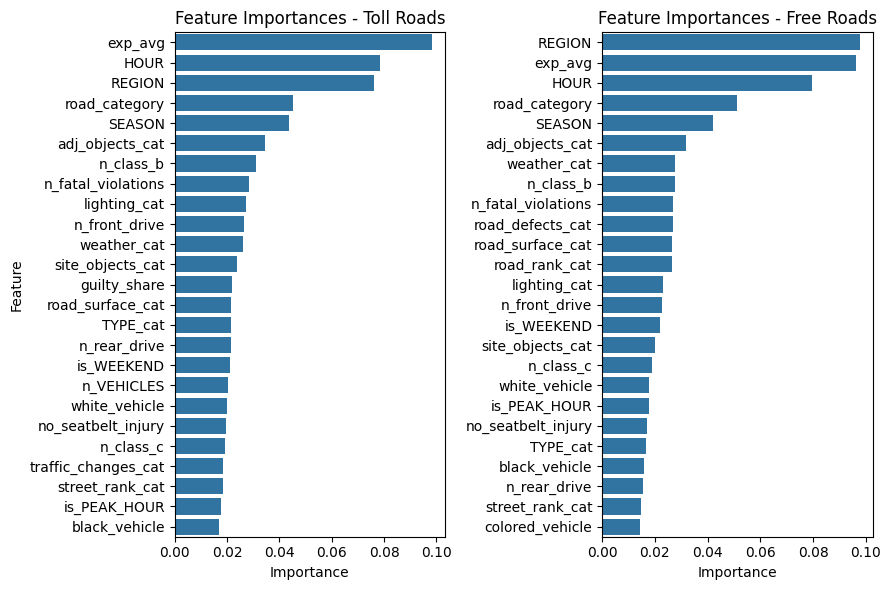

In [10]:
# Feature importances
importances_toll = pd.Series(rf_toll.feature_importances_, index=X_toll.columns).sort_values(ascending=False)
importances_free = pd.Series(rf_free.feature_importances_, index=X_free.columns).sort_values(ascending=False)

top_n = 25
imp_toll_filt = importances_toll.nlargest(top_n)
imp_free_filt = importances_free.nlargest(top_n)

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=imp_toll_filt.values, y=imp_toll_filt.index)
plt.title("Feature Importances - Toll Roads")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.subplot(1, 2, 2)
sns.barplot(x=imp_free_filt.values, y=imp_free_filt.index)
plt.title("Feature Importances - Free Roads")
plt.xlabel("Importance")
plt.ylabel("")

plt.tight_layout()
plt.show()

Let's choose the most important fearures for analysis.

In [41]:
threshold = 0.01

# -------------------

importances_toll = rf_toll.feature_importances_
feature_names = X_toll.columns

importances_df_toll = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_toll
})

# filter out unimportant features except 'is_toll'
low_importance_features = importances_df_toll[
    (importances_df_toll['importance'] < threshold) & 
    (importances_df_toll['feature'] != 'is_toll')
]['feature'].tolist()

X_toll_filtered = X_toll.drop(columns=low_importance_features)

# -------------------

importances_free = rf_free.feature_importances_
feature_names = X_free.columns

importances_df_free = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_free
})

low_importance_features = importances_df_free[
    (importances_df_free['importance'] < threshold) & 
    (importances_df_free['feature'] != 'is_toll')
]['feature'].tolist()

X_free_filtered = X_free.drop(columns=low_importance_features)

In [42]:
y_toll = df_toll['severity'] - 1
y_free = df_free['severity'] - 1

xgb_toll = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_toll.fit(X_toll_filtered, y_toll)

xgb_free = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_free.fit(X_free_filtered, y_free)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
proba_toll = xgb_toll.predict_proba(X_toll_filtered)
proba_free = xgb_free.predict_proba(X_free_filtered)

avg_proba_toll = np.mean(proba_toll, axis=0)
avg_proba_free = np.mean(proba_free, axis=0)

print("Toll roads vs free roads\n")
print(f"'Light' severity:  {avg_proba_toll[0]:3f} | {avg_proba_free[0]:3f}")
print(f"'Medium' severity:  {avg_proba_toll[1]:3f} | {avg_proba_free[1]:3f}")
print(f"'Severe' severity:  {avg_proba_toll[2]:3f} | {avg_proba_free[2]:3f}")

Toll roads vs free roads

'Light' severity:  0.405521 | 0.442592
'Medium' severity:  0.408894 | 0.390171
'Severe' severity:  0.185585 | 0.167231


To test the hypothesis, an XGBoost model trained to predict the severity of accidents was also used. Calculation of the average probabilities of classes by subsamples showed that the probability of a severe outcome (`medium` and `severe`) on toll roads is higher (`0.408` versus `0.39` and `0.186` versus `0.167`), which **corresponds to the hypothesis 2.1**. The result was obtained with all other things being equal, which further confirms the stability of the differences.

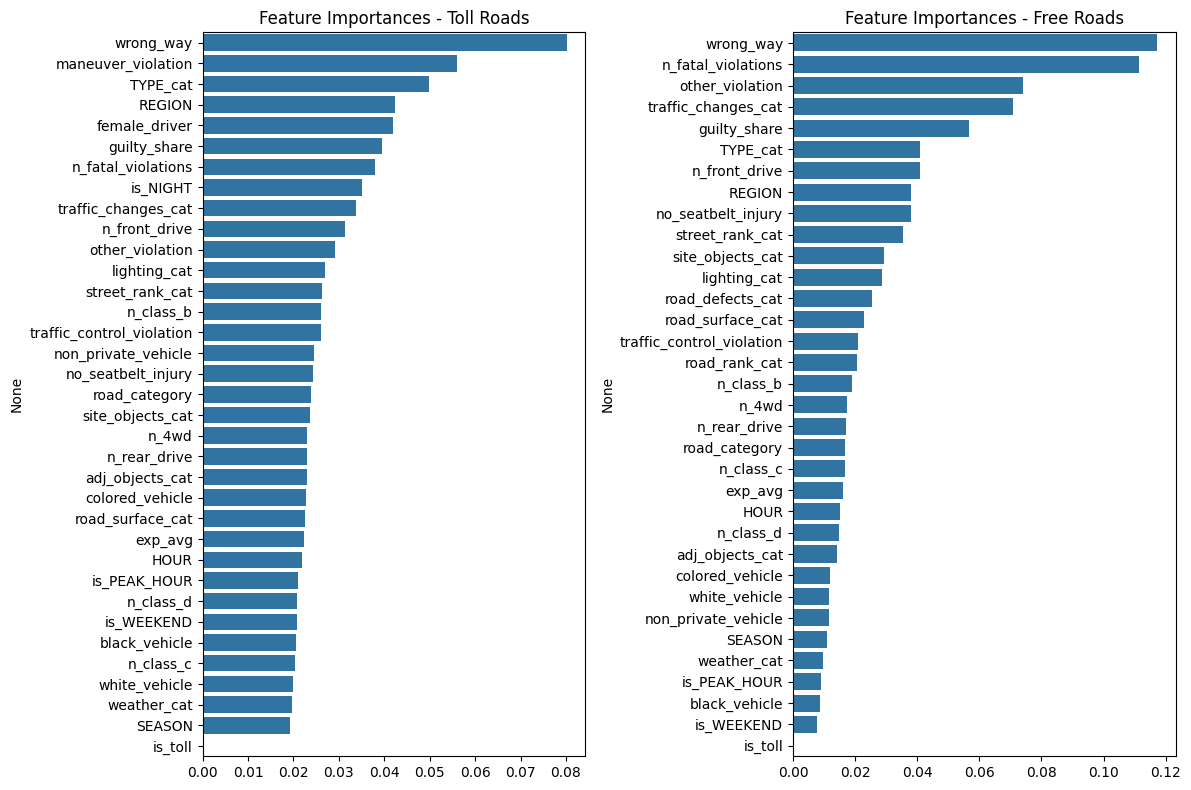

In [44]:
# Feature importances
importances_toll = pd.Series(xgb_toll.feature_importances_, index=X_toll_filtered.columns).sort_values(ascending=False)
importances_free = pd.Series(xgb_free.feature_importances_, index=X_free_filtered.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=importances_toll.values, y=importances_toll.index)
plt.title("Feature Importances - Toll Roads")

plt.subplot(1, 2, 2)
sns.barplot(x=importances_free.values, y=importances_free.index)
plt.title("Feature Importances - Free Roads")

plt.tight_layout()
plt.show()

The comparison of feature importance between models trained separately on data for toll and free roads confirms that **the mechanisms determining accident severity differ depending on the road type**. For example, on **toll roads**, features such as `maneuver_violation`, `female_driver`, `REGION`, and `TYPE_cat` are highly significant, while on **free roads**, the top important features include `n_fatal_violations`, `other_violation`, `traffic_changes_cat`, and `road_defects_cat`. Notably, the variable `wrong_way` consistently ranks first in both cases, which could suggest its universal influence, but the rest of the feature profile is different. It is also worth noting that the variable `is_toll` has minimal importance in both models, which makes sense since the data is already split by this feature, and the model should not extract additional information from it.

Thus, the observed differences in feature importance structure **confirm hypothesis 2.2**, which posits that the factors influencing the severity of traffic accidents differ depending on the type of road infrastructure.

## Model predicting crash severity

In [ ]:
X_num_toll = X_toll.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_scaled_toll = scaler.fit_transform(X_num_toll)
pca = PCA(n_components=2)
X_pca_toll = pca.fit_transform(X_scaled_toll)

X_num_free = X_free.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_scaled_free = scaler.fit_transform(X_num_free)
pca = PCA(n_components=2)
X_pca_free = pca.fit_transform(X_scaled_free)

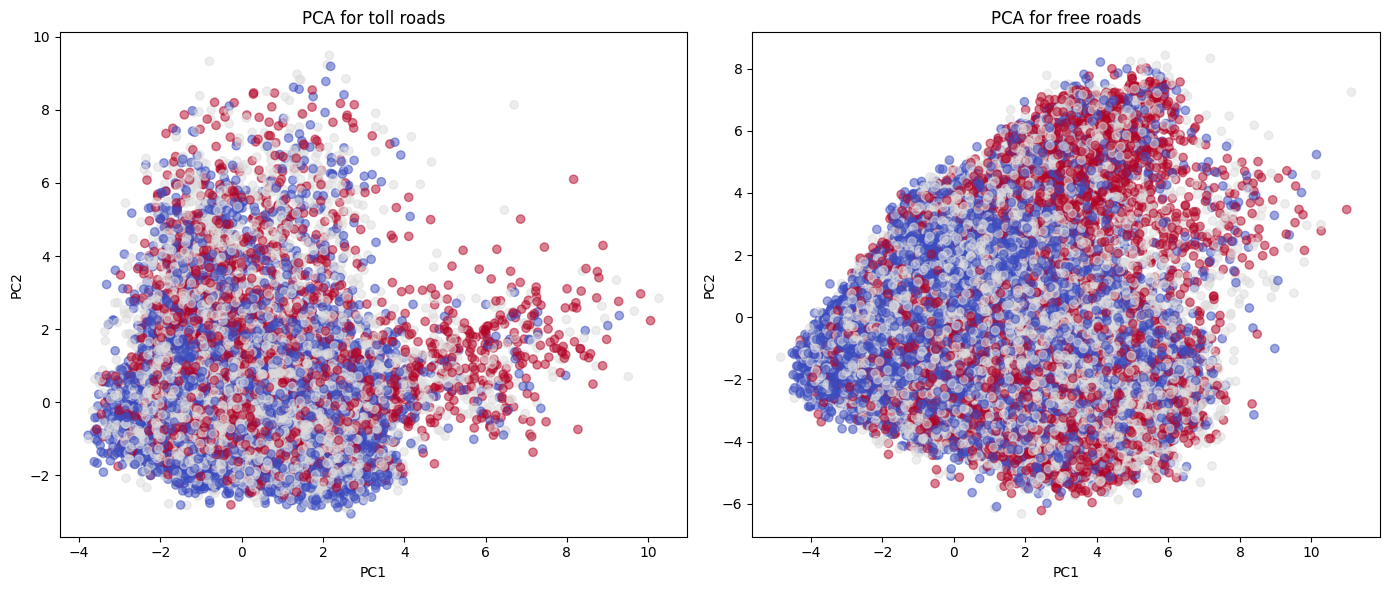

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_pca_toll[:,0], X_pca_toll[:,1], c=y_toll, cmap='coolwarm', alpha=0.5)
axes[0].set_title("PCA for toll roads")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(X_pca_free[:,0], X_pca_free[:,1], c=y_free, cmap='coolwarm', alpha=0.5)
axes[1].set_title("PCA for free roads")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

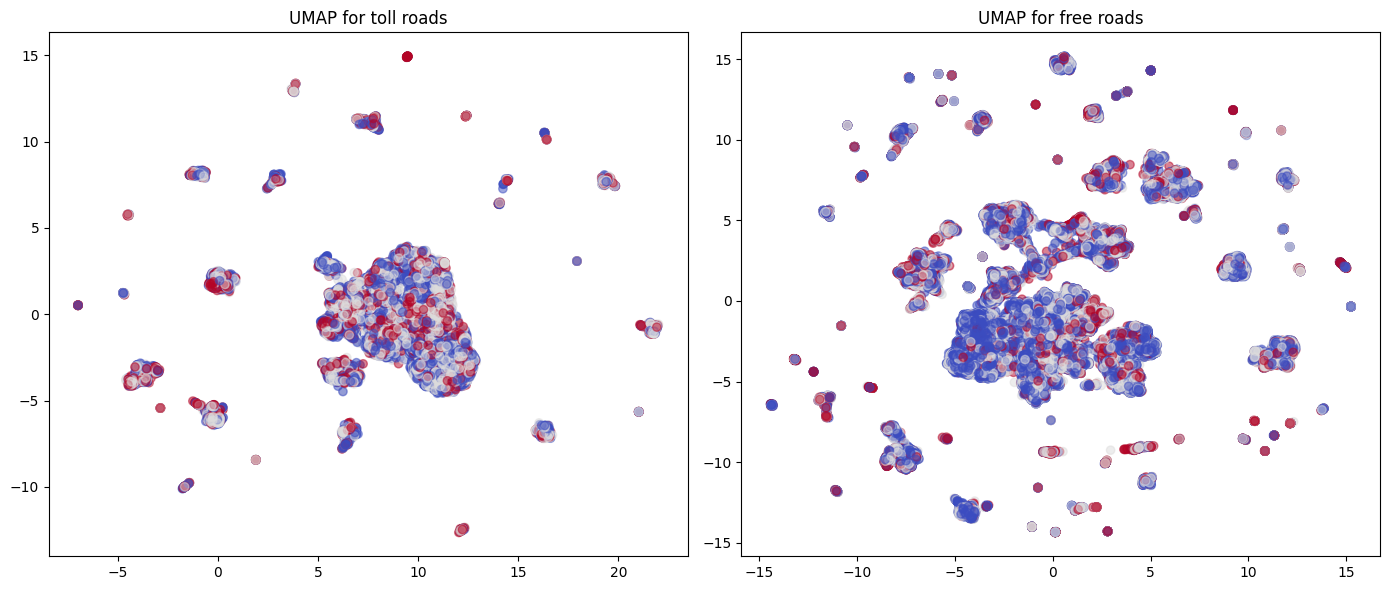

In [46]:
reducer = umap.UMAP()
X_umap_toll = reducer.fit_transform(X_scaled_toll)

reducer = umap.UMAP()
X_umap_free = reducer.fit_transform(X_scaled_free)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_umap_toll[:,0], X_umap_toll[:,1], c=y_toll, cmap='coolwarm', alpha=0.5)
axes[0].set_title("UMAP for toll roads")

axes[1].scatter(X_umap_free[:,0], X_umap_free[:,1], c=y_free, cmap='coolwarm', alpha=0.5)
axes[1].set_title("UMAP for free roads")

plt.tight_layout()
plt.show()

Visualization of the data using dimensionality reduction methods such as PCA and UMAP reveals that observations with varying accident severity (`'severity'`) heavily overlap in the feature space, both on toll and free roads. This suggests that the severity classes are poorly separable: they do not form distinct clusters and lack clear boundaries between them. This weak structuring may be due to several factors: firstly, the severity feature might depend on complex interactions between factors that are not captured by simple projections. Secondly, the data are real-world data, which could be too noisy for accurately predicting the severity class of an accident.

Nevertheless, even with visual inseparability, it is still worth attempting to achieve acceptable performance in predicting `'severity'`. We will evaluate the performance of different models for the task of predicting accident severity and also investigate whether feature engineering and parameter tuning can lead to improved accuracy and help identify significant factors influencing the outcome of accidents.

In [47]:
drop_features = [
    'severity',
    'n_DEATHS',
    'n_INJURED',
    'road_name',
    'DATE',
    'ID',
    'COORD_L', 
    'COORD_W'
]

features = [col for col in df_hypoth.columns if col not in drop_features]

X = df_hypoth[features]
y = df_hypoth['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 (macro): 0.4468946434868981
Accuracy: 0.5055778974393929


In [49]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train-1)

y_pred = xgb.predict(X_test)

print("F1 (macro):", f1_score(y_test-1, y_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test-1, y_pred))

F1 (macro): 0.47938292687753975
Accuracy: 0.535171426623952


Случайное угадывание для классификации с тремя классами составляем 33%. Градиентный бустинг бал небольшой прирост качества относительно исходного решающего дерева, но метрики всё равно оставляют желать лучшего, подбор гиперпараметров не даст тот рост метрик, который нам нужен.

Если наши данные не разделимы в исходном пространстве признаков, попробуем отобразить их в более высокое измерение, используя ядровые методы.

Однако ядровые методы (например, ниже попробуем ядровой SVM) очень плохо масштабируется по количеству наблюдений — время работы и потребление памяти растут квадратично или даже кубически с размером выборки, так как он строит матрицу Грама (kernel matrix), которая имеет размер N × N, где N — количество объектов. Поэтому попробуем несколько разных методов:

1. попробовать SVM с ядром на меньшей выборке (50к наблюдений вместо 500к)
2. воспользуемся ядровой аппроксимацией

### 1. Ядровой SVM на меньшей выборке

Сократим количество наблюдений с 500 тысяч до 50 тысяч. Сделаем это просто рандомным образом, так как будем использовать параметр в svm `class_weight='balanced'`, который компенсирует дисбаланс предсказываемых классов.

In [ ]:
X_sampled = X.sample(n=50000, random_state=42)
y_sampled = y.loc[X_sampled.index]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

svc = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svc.fit(X_train_s, y_train_s)

y_pred_s = svc.predict(X_test_s)
print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test_s, y_pred_s))

F1 (macro): 0.09998506735521069
Accuracy: 0.3927


In [54]:
y_sampled.value_counts()

severity
1    22265
2    19444
3     8291
Name: count, dtype: int64

### 2. Ядровая аппроксимация

Ядровые аппроксимации ялвяются способом ускорениия линейных методов. Они имитируют эффект ядра, но делают это в пространстве фиксированной размерности — так, что можно использовать быстрые линейные модели. Будем использовать **ядро RBF**:

$$
K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
$$

Вместо того чтобы строить громоздкую матрицу, оно преобразует данные в новое пространство признаков (например, размерностью 100–500), где линейная модель может имитировать поведение SVM с ядром.

In [ ]:
model = make_pipeline(
    RBFSampler(gamma=0.1, n_components=500, random_state=42),
    SGDClassifier(loss='hinge', class_weight='balanced')
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 (macro): 0.31323395626002315
Accuracy: 0.4183991093540545
